In [ ]:
# Install gdown if not available
!pip install gdown --quiet

import gdown
import pandas as pd

# ============================
# Replace these with your links
# ============================
train_url = "https://drive.google.com/file/d/1lRLZyebOdT2UIRvrPKJoE4a6TqGxczZG/view?usp=drive_link"
test_url  = "https://drive.google.com/file/d/1fwcV7K0vq5OiuS33dw_0Y48lZZSuyZg_/view?usp=drive_link"

# Extract file IDs
train_id = train_url.split("/d/")[1].split("/")[0]
test_id  = test_url.split("/d/")[1].split("/")[0]

# Download files
gdown.download(f"https://drive.google.com/uc?id={train_id}", "train.csv", quiet=False)
gdown.download(f"https://drive.google.com/uc?id={test_id}", "test.csv", quiet=False)

# Load datasets
try:
    train = pd.read_csv("train.csv")
    print("Training dataset loaded successfully!")
except FileNotFoundError:
    print("Training file not found.")
    train = None

try:
    test = pd.read_csv("test.csv")
    print("Testing dataset loaded successfully!")
except FileNotFoundError:
    print("Testing file not found. We'll create a test split from the training data.")
    test = None


Downloading...
From (original): https://drive.google.com/uc?id=1lRLZyebOdT2UIRvrPKJoE4a6TqGxczZG
From (redirected): https://drive.google.com/uc?id=1lRLZyebOdT2UIRvrPKJoE4a6TqGxczZG&confirm=t&uuid=bc7dc2a8-bd9e-4749-9ee5-84169bd802db
To: /content/train.csv
100%|██████████| 165M/165M [00:02<00:00, 61.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fwcV7K0vq5OiuS33dw_0Y48lZZSuyZg_
To: /content/test.csv
100%|██████████| 35.5M/35.5M [00:00<00:00, 48.9MB/s]


Training dataset loaded successfully!
Testing dataset loaded successfully!


In [ ]:
print(train.shape)
print(test.shape)
train.head()


(279999, 2)
(59999, 2)


QA Text                  Class
0  Question Title:\nWhat are the names of the 206...  Science & Mathematics
1  Question Title:\ncan you tell me the universit...  Education & Reference
2  Question Title:\nSuggestions or Advice on trac...  Politics & Government
3  Question Title:\nwhere can i find the system o...  Entertainment & Music
4  Question Title:\nwill the first tour match bet...                 Sports

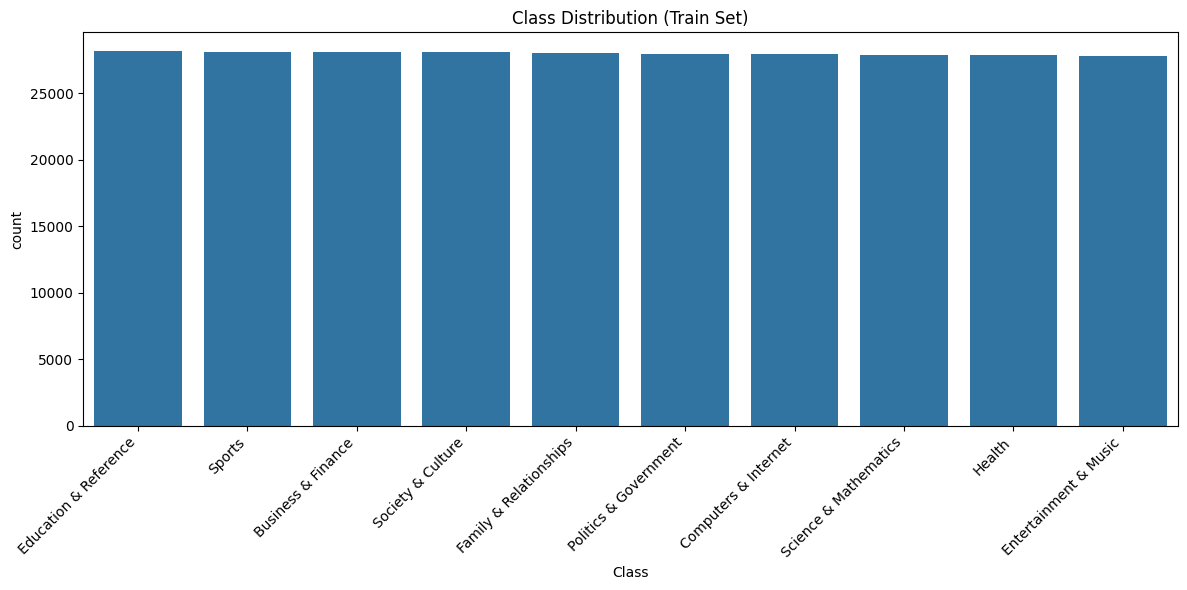


Class distribution (%):
Class
Education & Reference     10.063250
Sports                    10.045393
Business & Finance        10.030393
Society & Culture         10.028964
Family & Relationships    10.017536
Politics & Government      9.995750
Computers & Internet       9.986464
Science & Mathematics      9.953607
Health                     9.951107
Entertainment & Music      9.927535
Name: proportion, dtype: float64


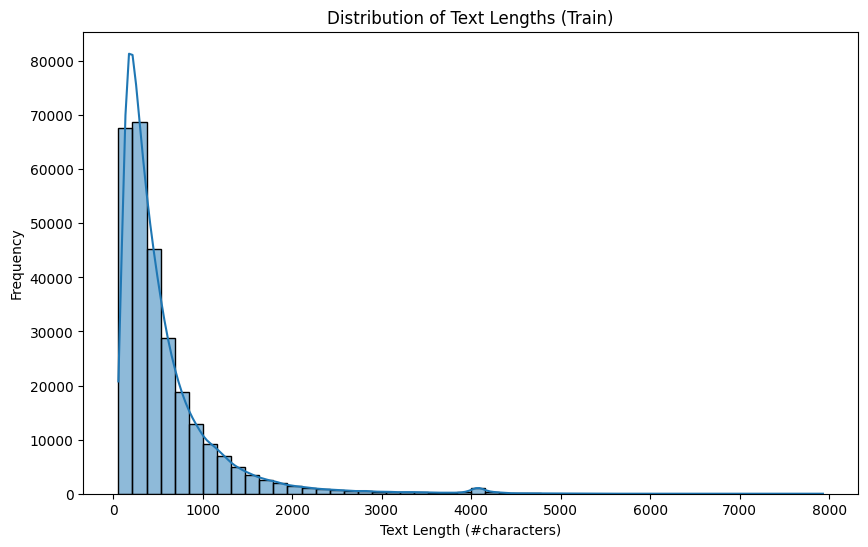

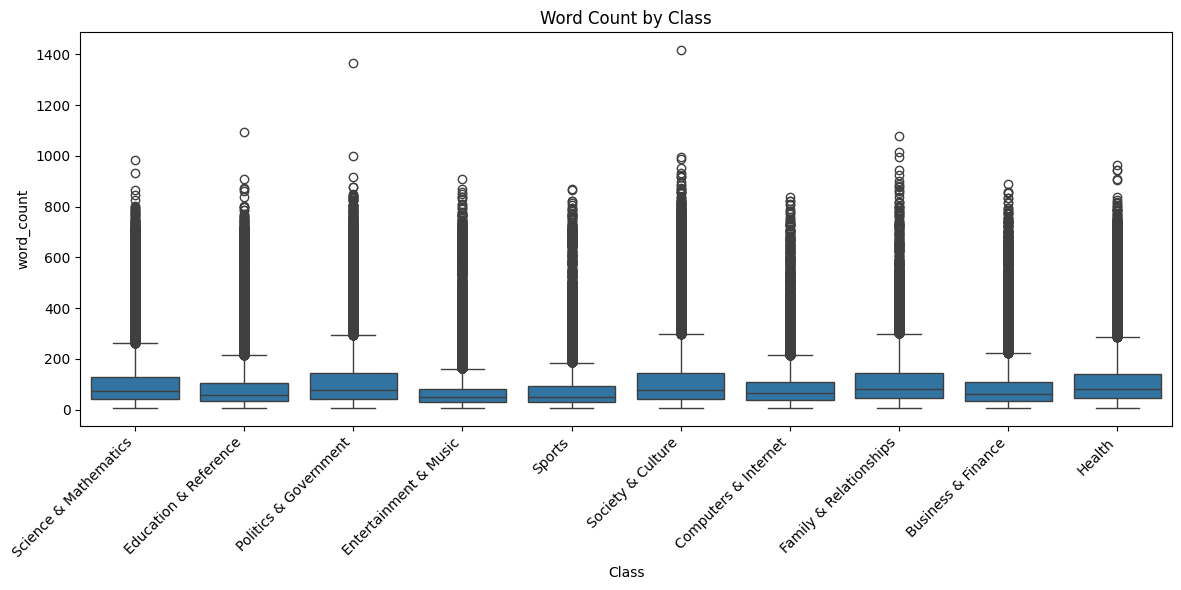

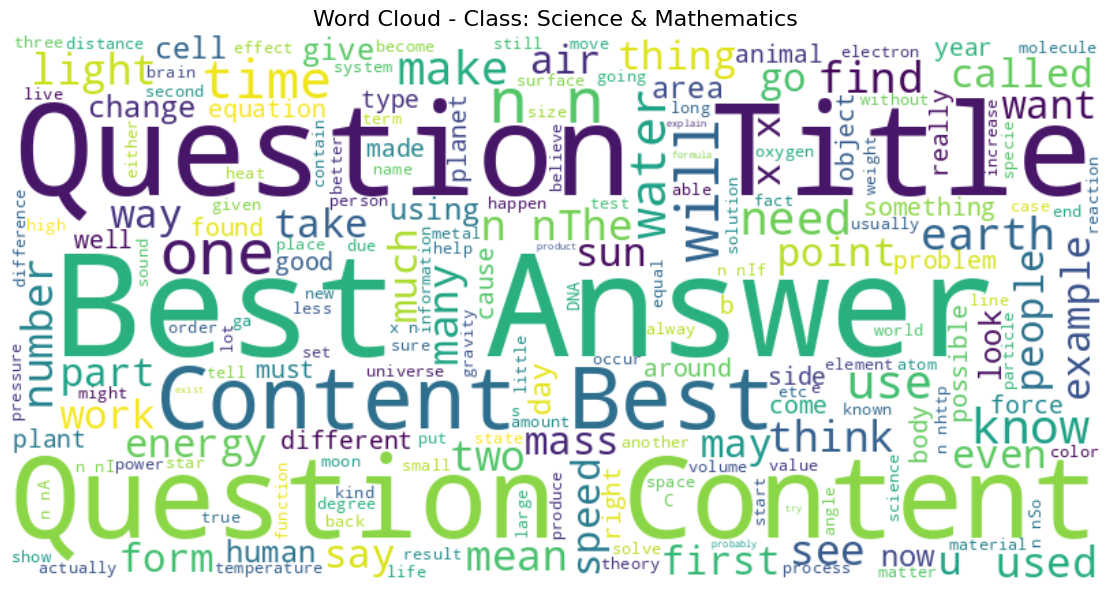

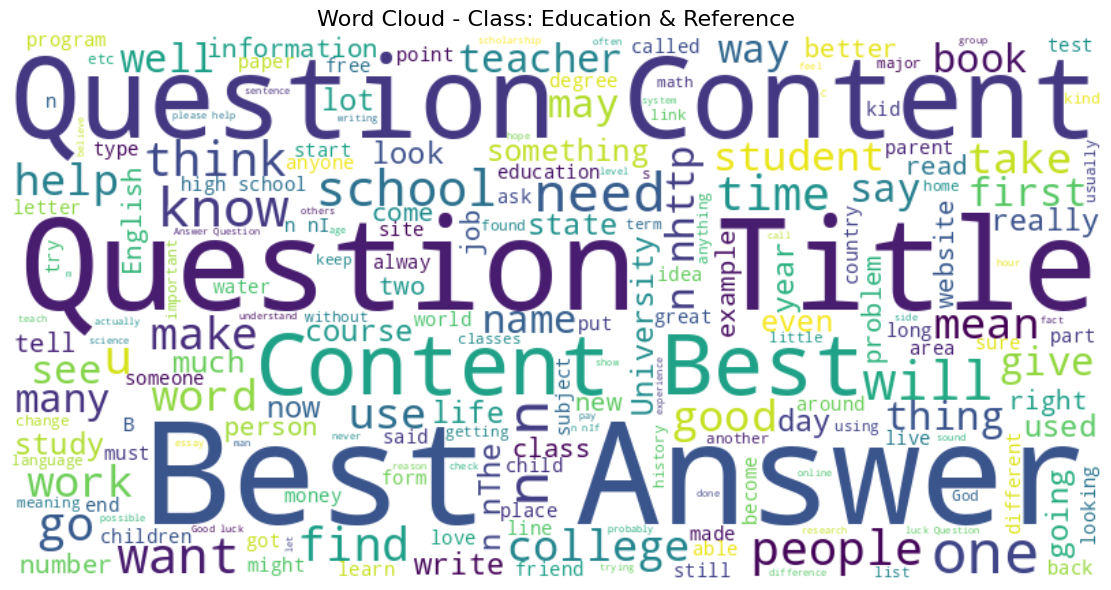

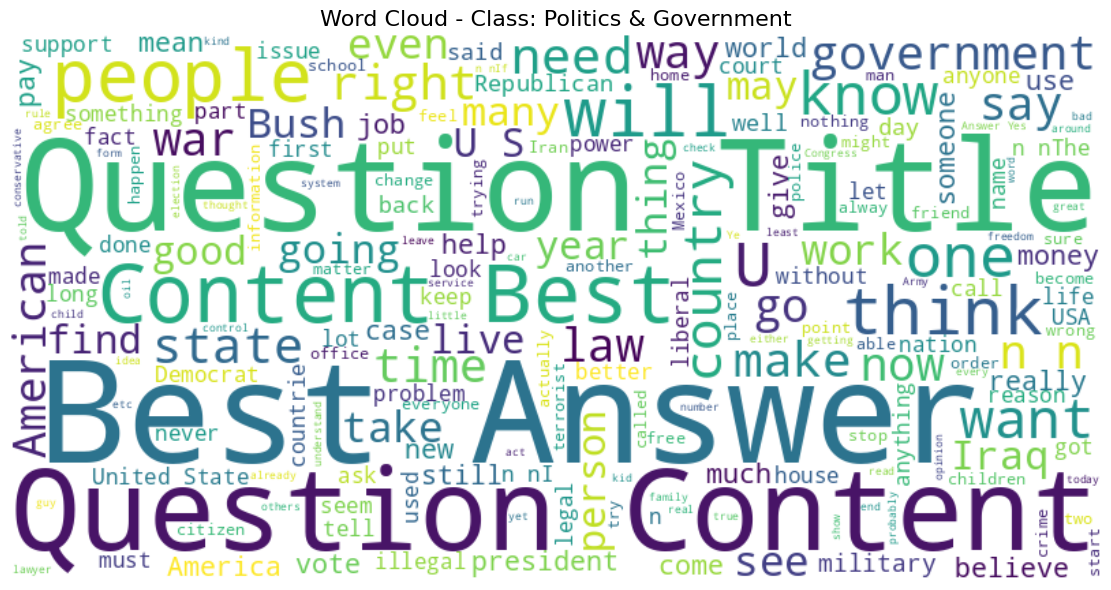

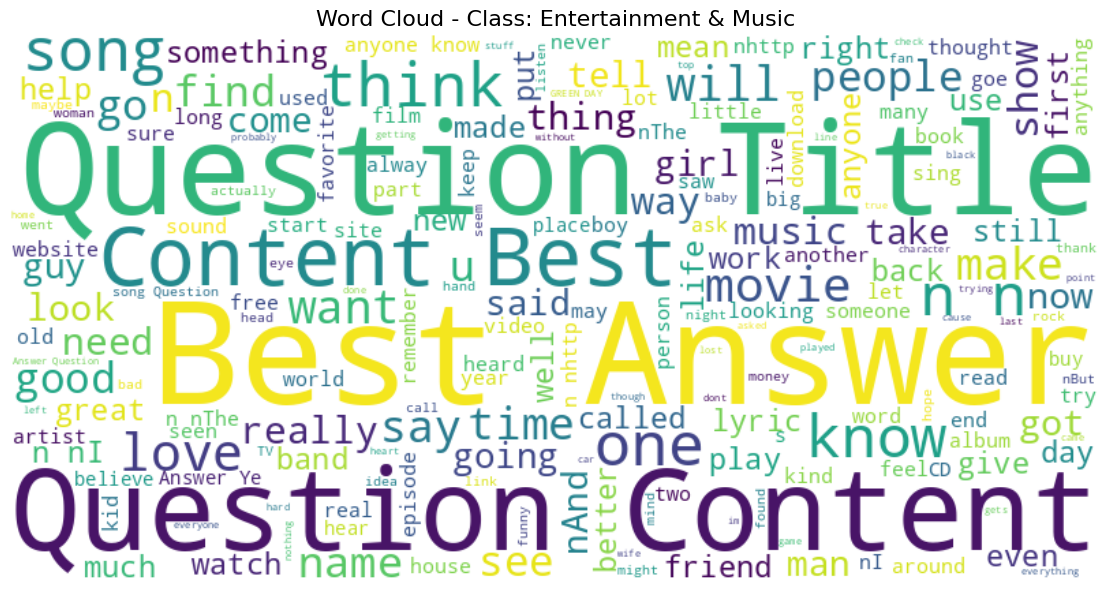

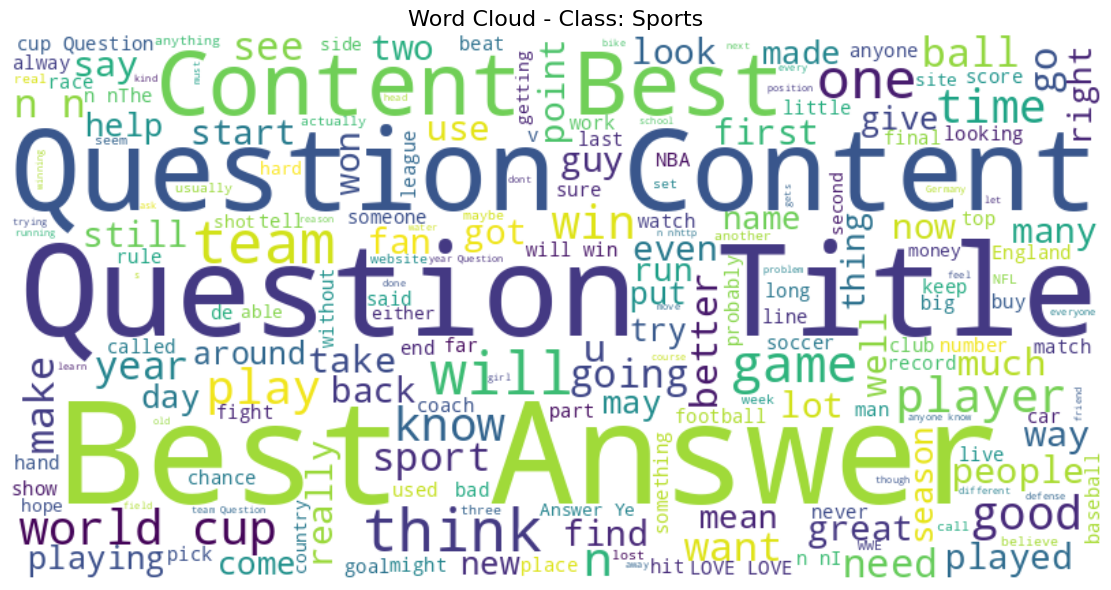

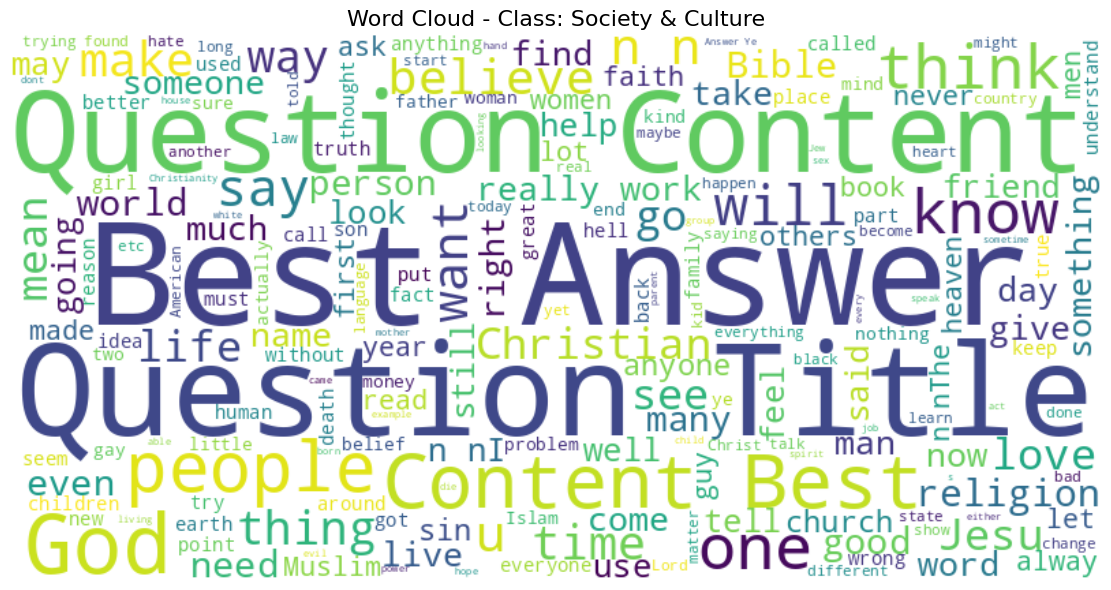

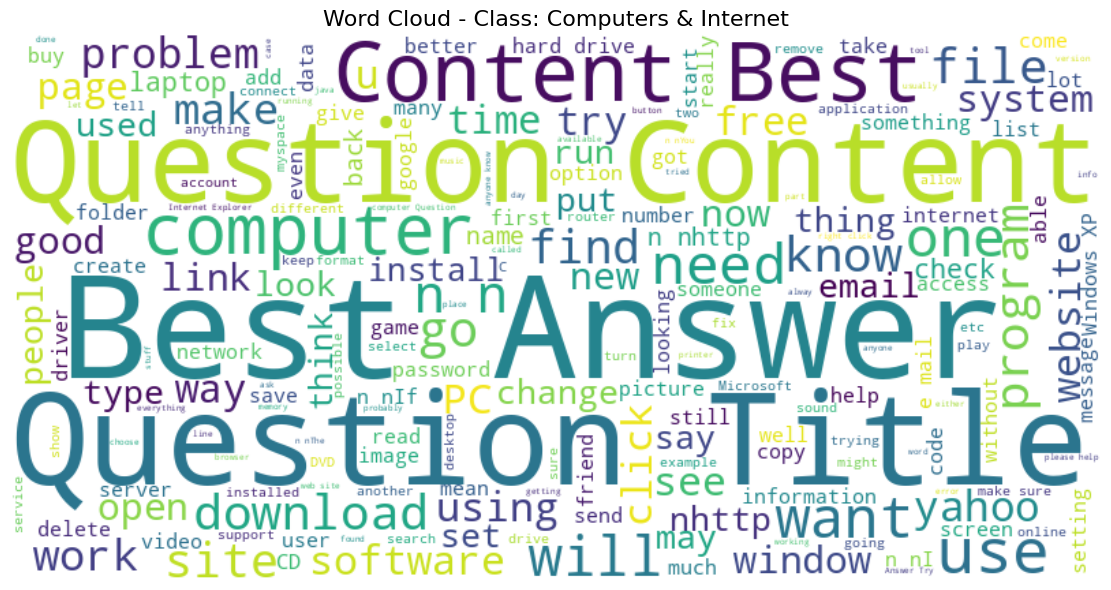

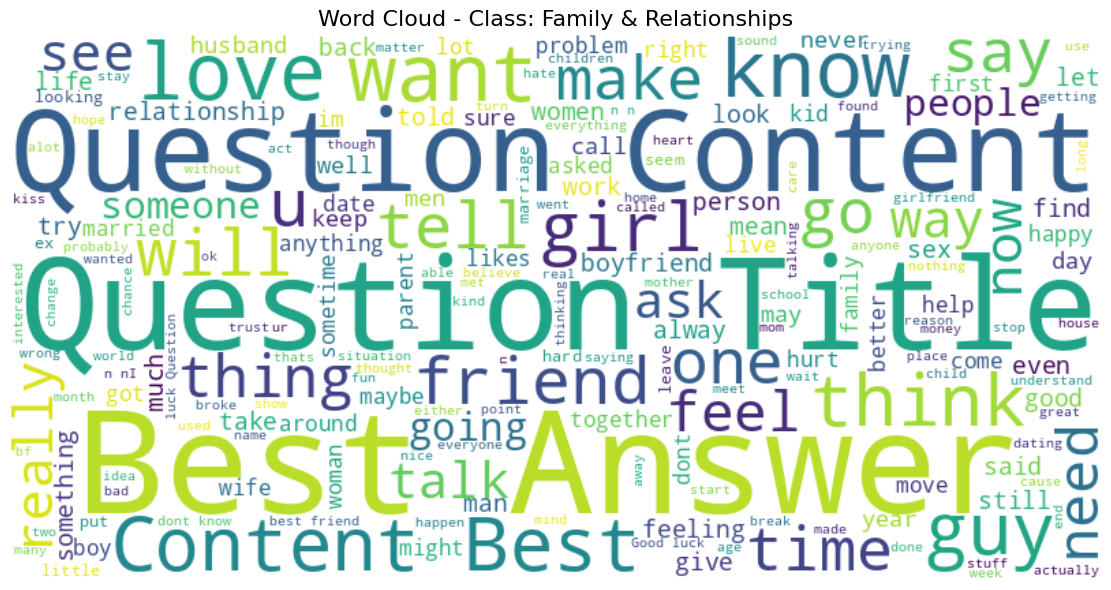

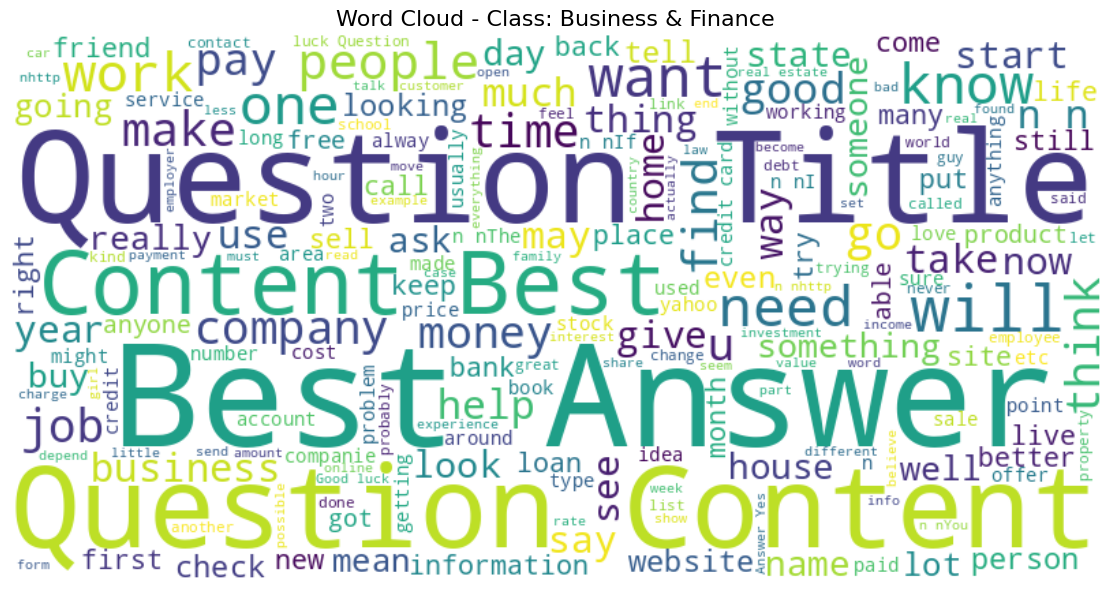

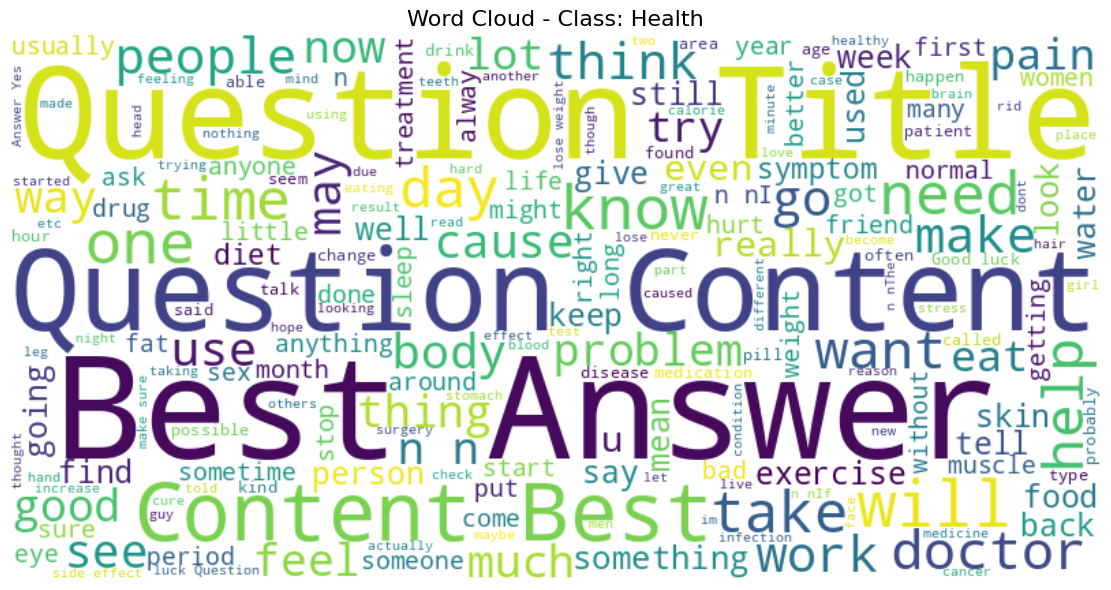

In [ ]:
# =============================
# Step 1: Exploratory Data Analysis
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- Load Data ---
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

# --- Class Distribution ---
plt.figure(figsize=(12,6))  # wider figure
sns.countplot(x="Class", data=train, order=train['Class'].value_counts().index)
plt.title("Class Distribution (Train Set)")
plt.xticks(rotation=45, ha='right')  # rotate labels
plt.tight_layout()
plt.show()

print("\nClass distribution (%):")
print(train['Class'].value_counts(normalize=True)*100)

# --- Text Length Distribution ---
train['text_length'] = train['QA Text'].apply(len)
test['text_length']  = test['QA Text'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(train['text_length'], bins=50, kde=True)
plt.title("Distribution of Text Lengths (Train)")
plt.xlabel("Text Length (#characters)")
plt.ylabel("Frequency")
plt.show()

# --- Word Count Distribution ---
train['word_count'] = train['QA Text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12,6))
sns.boxplot(x='Class', y='word_count', data=train)
plt.title("Word Count by Class")
plt.xticks(rotation=45, ha='right')  # rotate labels
plt.tight_layout()
plt.show()

# --- Word Clouds per Class ---
for label in train['Class'].unique():
    subset = train[train['Class'] == label]
    text = " ".join(subset['QA Text'].astype(str).values)
    wordcloud = WordCloud(
        width=800, height=400,
        background_color="white",
        max_words=200
    ).generate(text)

    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - Class: {label}", fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
# =============================
# Step 2: Preprocessing (Fixed)
# =============================
import pandas as pd
import re, string, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# --- Download NLTK resources ---
nltk.download("stopwords")
nltk.download("wordnet")

# --- Initialize stopwords and lemmatizer ---
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# --- Text cleaning function ---
def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(f"[{string.punctuation}]", " ", text)  # remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# --- Load raw CSV files ---
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")

# --- Apply text cleaning ---
train["clean_text"] = train["QA Text"].apply(clean_text)
test["clean_text"]  = test["QA Text"].apply(clean_text)

# --- Save preprocessed datasets ---
train.to_csv("train_processed.csv", index=False)
test.to_csv("test_processed.csv", index=False)

print("✅ Preprocessing complete! Files saved as 'train_processed.csv' and 'test_processed.csv'")
print(train[["QA Text", "clean_text", "Class"]].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


✅ Preprocessing complete! Files saved as 'train_processed.csv' and 'test_processed.csv'
                                             QA Text  \
0  Question Title:\nWhat are the names of the 206...   
1  Question Title:\ncan you tell me the universit...   
2  Question Title:\nSuggestions or Advice on trac...   
3  Question Title:\nwhere can i find the system o...   
4  Question Title:\nwill the first tour match bet...   

                                          clean_text                  Class  
0  question title name 206 bone human body questi...  Science & Mathematics  
1  question title tell university name distance m...  Education & Reference  
2  question title suggestion advice tracking some...  Politics & Government  
3  question title find system poem victim questio...  Entertainment & Music  
4  question title first tour match india south af...                 Sports  


Training Random Forest (Balanced BoW):


 10%|█         | 20/200 [00:49<07:00,  2.34s/it]

Trained 20/200 trees


 20%|██        | 40/200 [01:41<06:46,  2.54s/it]

Trained 40/200 trees


 30%|███       | 60/200 [02:32<06:11,  2.66s/it]

Trained 60/200 trees


 40%|████      | 80/200 [03:24<05:06,  2.56s/it]

Trained 80/200 trees


 50%|█████     | 100/200 [04:16<04:07,  2.48s/it]

Trained 100/200 trees


 60%|██████    | 120/200 [05:05<03:09,  2.36s/it]

Trained 120/200 trees


 70%|███████   | 140/200 [05:55<02:29,  2.49s/it]

Trained 140/200 trees


 80%|████████  | 160/200 [06:46<01:39,  2.50s/it]

Trained 160/200 trees


 90%|█████████ | 180/200 [07:35<00:48,  2.43s/it]

Trained 180/200 trees


100%|██████████| 200/200 [08:26<00:00,  2.53s/it]

Trained 200/200 trees



Accuracy: 0.554942582376373
F1 Score: 0.553575538159955
                        precision    recall  f1-score   support

    Business & Finance       0.59      0.35      0.44      6000
  Computers & Internet       0.63      0.80      0.71      6000
 Education & Reference       0.56      0.29      0.38      6000
 Entertainment & Music       0.76      0.38      0.51      6000
Family & Relationships       0.54      0.72      0.62      5999
                Health       0.68      0.60      0.64      6000
 Politics & Government       0.63      0.64      0.64      6000
 Science & Mathematics       0.30      0.73      0.43      6000
     Society & Culture       0.59      0.40      0.48      6000
                Sports       0.78      0.64      0.70      6000

              accuracy                           0.55     59999
             macro avg       0.61      0.55      0.55     59999
          weighted avg       0.61      0.55      0.55     59999



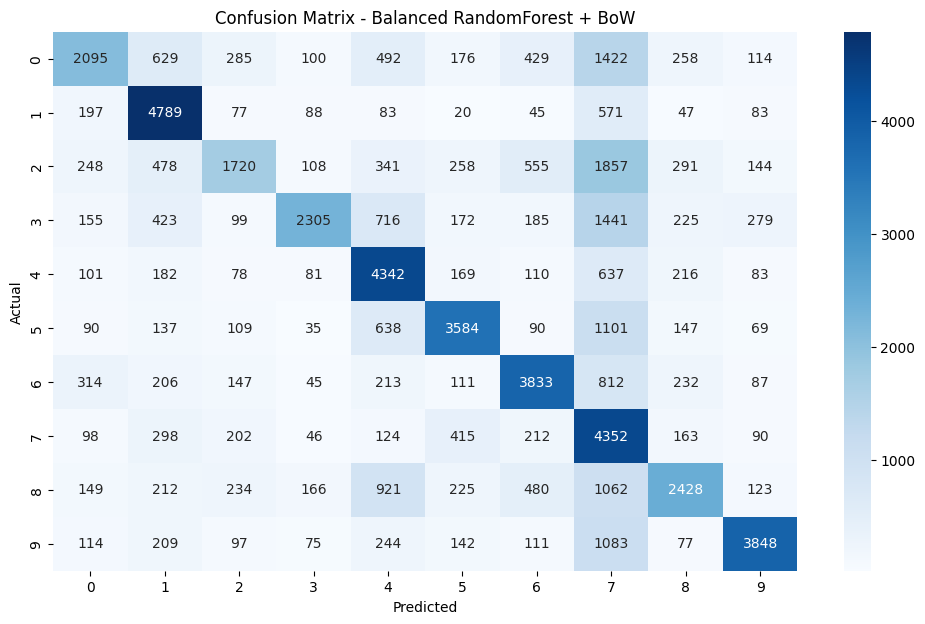

In [ ]:
# =============================
# Balanced BoW + Random Forest
# =============================
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# --- Load preprocessed data ---
train = pd.read_csv("train_processed.csv")
test  = pd.read_csv("test_processed.csv")

X_train, y_train = train["clean_text"], train["Class"]
X_test, y_test   = test["clean_text"], test["Class"]

# --- BoW Vectorization (larger vocab for better accuracy) ---
vectorizer = CountVectorizer(max_features=5000)
Xtr = vectorizer.fit_transform(X_train)
Xte = vectorizer.transform(X_test)

# --- Balanced Random Forest with progress ---
n_estimators = 200
model = RandomForestClassifier(
    n_estimators=1,     # start with 1 tree
    max_depth=30,       # deeper trees for better accuracy
    warm_start=True,    # incremental training for progress display
    n_jobs=-1,          # use all CPU cores
    random_state=42
)

print("Training Random Forest (Balanced BoW):")
for i in tqdm(range(1, n_estimators + 1)):
    model.n_estimators = i
    model.fit(Xtr, y_train)
    if i % 20 == 0:  # print every 20 trees
        print(f"Trained {i}/{n_estimators} trees")

# --- Predictions ---
preds = model.predict(Xte)

# --- Metrics ---
print("\nAccuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds, average="weighted"))
print(classification_report(y_test, preds))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Balanced RandomForest + BoW")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Training Random Forest (balanced speed & accuracy):


 10%|█         | 20/200 [01:00<08:38,  2.88s/it]

Trained 20/200 trees


 20%|██        | 40/200 [02:05<08:42,  3.26s/it]

Trained 40/200 trees


 30%|███       | 60/200 [03:10<07:47,  3.34s/it]

Trained 60/200 trees


 40%|████      | 80/200 [04:18<06:42,  3.35s/it]

Trained 80/200 trees


 50%|█████     | 100/200 [05:21<05:06,  3.07s/it]

Trained 100/200 trees


 60%|██████    | 120/200 [06:23<03:56,  2.95s/it]

Trained 120/200 trees


 70%|███████   | 140/200 [07:29<03:08,  3.15s/it]

Trained 140/200 trees


 80%|████████  | 160/200 [08:35<02:05,  3.13s/it]

Trained 160/200 trees


 90%|█████████ | 180/200 [09:36<00:59,  2.98s/it]

Trained 180/200 trees


100%|██████████| 200/200 [10:41<00:00,  3.21s/it]

Trained 200/200 trees



Accuracy: 0.5601760029333822
F1 Score: 0.5562034734449098
                        precision    recall  f1-score   support

    Business & Finance       0.54      0.36      0.43      6000
  Computers & Internet       0.65      0.79      0.71      6000
 Education & Reference       0.41      0.33      0.36      6000
 Entertainment & Music       0.39      0.56      0.46      6000
Family & Relationships       0.55      0.74      0.63      5999
                Health       0.68      0.59      0.63      6000
 Politics & Government       0.64      0.63      0.64      6000
 Science & Mathematics       0.48      0.57      0.52      6000
     Society & Culture       0.61      0.40      0.48      6000
                Sports       0.76      0.65      0.70      6000

              accuracy                           0.56     59999
             macro avg       0.57      0.56      0.56     59999
          weighted avg       0.57      0.56      0.56     59999



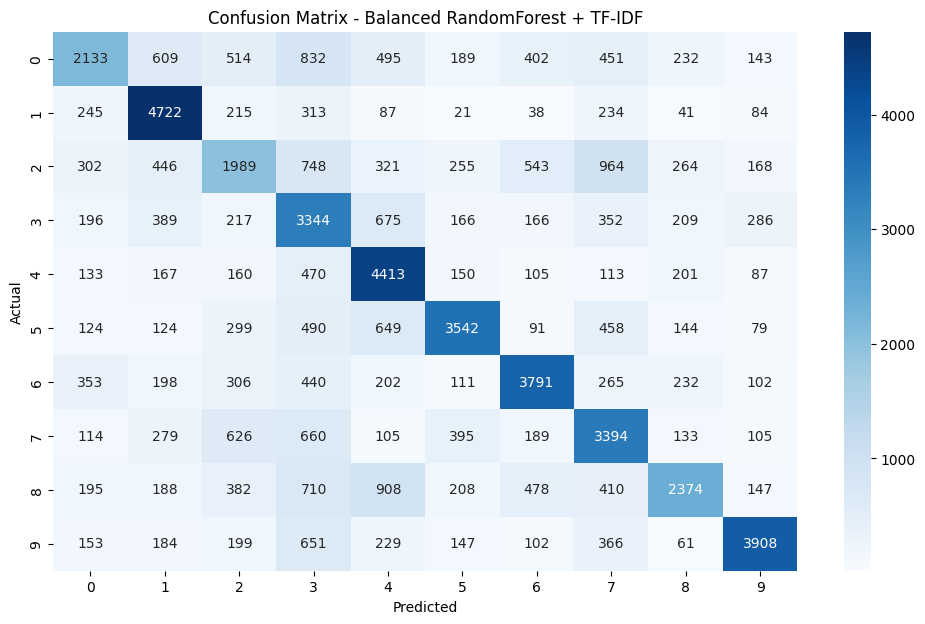

In [ ]:
# =============================
# Balanced TF-IDF + Random Forest
# =============================
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# --- Load preprocessed data ---
train = pd.read_csv("train_processed.csv")
test  = pd.read_csv("test_processed.csv")

X_train, y_train = train["clean_text"], train["Class"]
X_test, y_test   = test["clean_text"], test["Class"]

# --- TF-IDF Vectorization (larger vocab for better accuracy) ---
vectorizer = TfidfVectorizer(max_features=5000)
Xtr = vectorizer.fit_transform(X_train)
Xte = vectorizer.transform(X_test)

# --- Balanced Random Forest with progress ---
n_estimators = 200
model = RandomForestClassifier(
    n_estimators=1,     # start with 1 tree
    max_depth=30,       # deeper trees for better accuracy
    warm_start=True,    # incremental training for progress display
    n_jobs=-1,
    random_state=42
)

print("Training Random Forest (balanced speed & accuracy):")
for i in tqdm(range(1, n_estimators + 1)):
    model.n_estimators = i
    model.fit(Xtr, y_train)
    if i % 20 == 0:  # print progress every 20 trees
        print(f"Trained {i}/{n_estimators} trees")

# --- Predictions ---
preds = model.predict(Xte)

# --- Metrics ---
print("\nAccuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds, average="weighted"))
print(classification_report(y_test, preds))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Balanced RandomForest + TF-IDF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Training Logistic Regression (BoW, light version) with progress...


100%|██████████| 20/20 [9:52:24<00:00, 1777.24s/it]


Training complete!

Accuracy: 0.6417273621227021
F1 Score: 0.6384810088815938
                        precision    recall  f1-score   support

    Business & Finance       0.54      0.46      0.50      6000
  Computers & Internet       0.77      0.82      0.79      6000
 Education & Reference       0.51      0.46      0.48      6000
 Entertainment & Music       0.55      0.61      0.58      6000
Family & Relationships       0.66      0.73      0.69      5999
                Health       0.71      0.72      0.71      6000
 Politics & Government       0.72      0.68      0.70      6000
 Science & Mathematics       0.60      0.71      0.65      6000
     Society & Culture       0.60      0.48      0.54      6000
                Sports       0.73      0.75      0.74      6000

              accuracy                           0.64     59999
             macro avg       0.64      0.64      0.64     59999
          weighted avg       0.64      0.64      0.64     59999



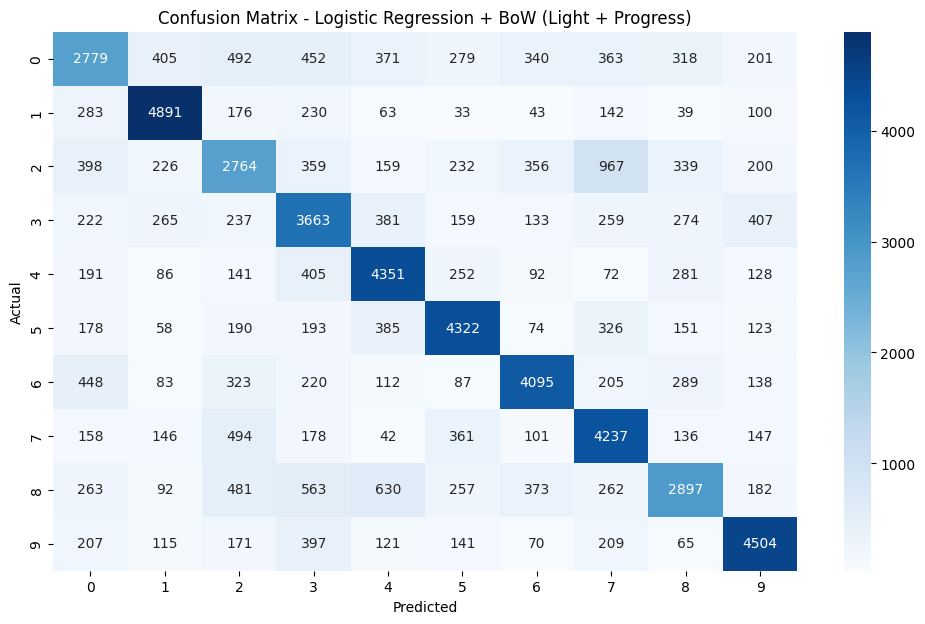

In [ ]:
# =============================
# Logistic Regression + BoW (Light + Progress)
# =============================
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
from sklearn.exceptions import ConvergenceWarning

# --- Suppress convergence warnings ---
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# --- Load preprocessed data ---
train = pd.read_csv("train_processed.csv")
test  = pd.read_csv("test_processed.csv")
X_train, y_train = train["clean_text"], train["Class"]
X_test, y_test   = test["clean_text"], test["Class"]

# --- BoW Vectorization (smaller features for speed) ---
vectorizer = CountVectorizer(max_features=2000)
Xtr = vectorizer.fit_transform(X_train)
Xte = vectorizer.transform(X_test)

# --- Logistic Regression setup with warm_start ---
lr = LogisticRegression(
    max_iter=50,      # iterations per chunk
    solver='saga',
    n_jobs=-1,
    random_state=42,
    warm_start=True   # allows incremental training
)
model = OneVsRestClassifier(lr)

# --- Train in increments with progress ---
print("Training Logistic Regression (BoW, light version) with progress...")
chunks = 20  # total iterations = 50 * 20 = 1000
for i in tqdm(range(chunks)):
    lr.max_iter = 50 * (i + 1)
    model.fit(Xtr, y_train)

print("Training complete!")

# --- Predictions ---
preds = model.predict(Xte)

# --- Metrics ---
print("\nAccuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds, average="weighted"))
print(classification_report(y_test, preds))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression + BoW (Light + Progress)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Training Logistic Regression (TF-IDF, super-ultra-light) with progress...


100%|██████████| 5/5 [04:12<00:00, 50.56s/it]


Training complete!

Accuracy: 0.5604426740445674
F1 Score: 0.5552363498142634
                        precision    recall  f1-score   support

    Business & Finance       0.49      0.39      0.44      6000
  Computers & Internet       0.66      0.75      0.70      6000
 Education & Reference       0.47      0.39      0.42      6000
 Entertainment & Music       0.52      0.50      0.51      6000
Family & Relationships       0.59      0.71      0.65      5999
                Health       0.58      0.63      0.61      6000
 Politics & Government       0.60      0.56      0.58      6000
 Science & Mathematics       0.51      0.61      0.55      6000
     Society & Culture       0.55      0.44      0.49      6000
                Sports       0.59      0.62      0.61      6000

              accuracy                           0.56     59999
             macro avg       0.56      0.56      0.56     59999
          weighted avg       0.56      0.56      0.56     59999



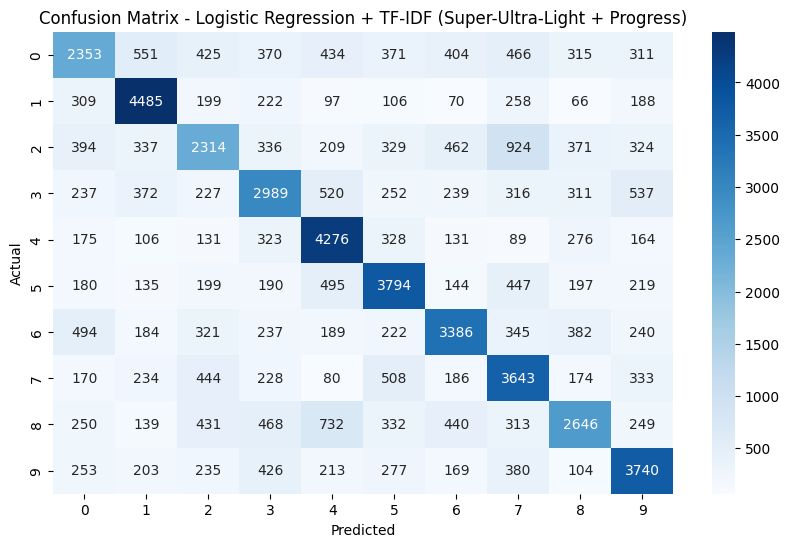

In [ ]:
# =============================
# Logistic Regression + TF-IDF (Super-Ultra-Light + Progress)
# =============================
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
from sklearn.exceptions import ConvergenceWarning

# --- Suppress convergence warnings ---
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# --- Load preprocessed data ---
train = pd.read_csv("train_processed.csv")
test  = pd.read_csv("test_processed.csv")
X_train, y_train = train["clean_text"], train["Class"]
X_test, y_test   = test["clean_text"], test["Class"]

# --- TF-IDF Vectorization (very small features for max speed) ---
vectorizer = TfidfVectorizer(max_features=500)
Xtr = vectorizer.fit_transform(X_train)
Xte = vectorizer.transform(X_test)

# --- Logistic Regression setup ---
lr = LogisticRegression(
    max_iter=10,      # very small steps
    solver='saga',
    n_jobs=-1,
    random_state=42,
    warm_start=True
)
model = OneVsRestClassifier(lr)

# --- Train in increments with progress ---
print("Training Logistic Regression (TF-IDF, super-ultra-light) with progress...")
chunks = 5  # total = 10 * 5 = 50 iterations
for i in tqdm(range(chunks)):
    lr.max_iter = 10 * (i + 1)
    model.fit(Xtr, y_train)

print("Training complete!")

# --- Predictions ---
preds = model.predict(Xte)

# --- Metrics ---
print("\nAccuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds, average="weighted"))
print(classification_report(y_test, preds))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression + TF-IDF (Super-Ultra-Light + Progress)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Training Naive Bayes (BoW, super-fast) with progress...


100%|██████████| 10/10 [00:00<00:00, 16.65it/s]


Training complete!

Accuracy: 0.5914765246087434
F1 Score: 0.5880719475249147
                        precision    recall  f1-score   support

    Business & Finance       0.51      0.43      0.47      6000
  Computers & Internet       0.68      0.80      0.73      6000
 Education & Reference       0.49      0.39      0.44      6000
 Entertainment & Music       0.44      0.59      0.50      6000
Family & Relationships       0.60      0.72      0.65      5999
                Health       0.70      0.63      0.67      6000
 Politics & Government       0.72      0.58      0.64      6000
 Science & Mathematics       0.62      0.61      0.62      6000
     Society & Culture       0.59      0.45      0.51      6000
                Sports       0.61      0.70      0.65      6000

              accuracy                           0.59     59999
             macro avg       0.60      0.59      0.59     59999
          weighted avg       0.60      0.59      0.59     59999



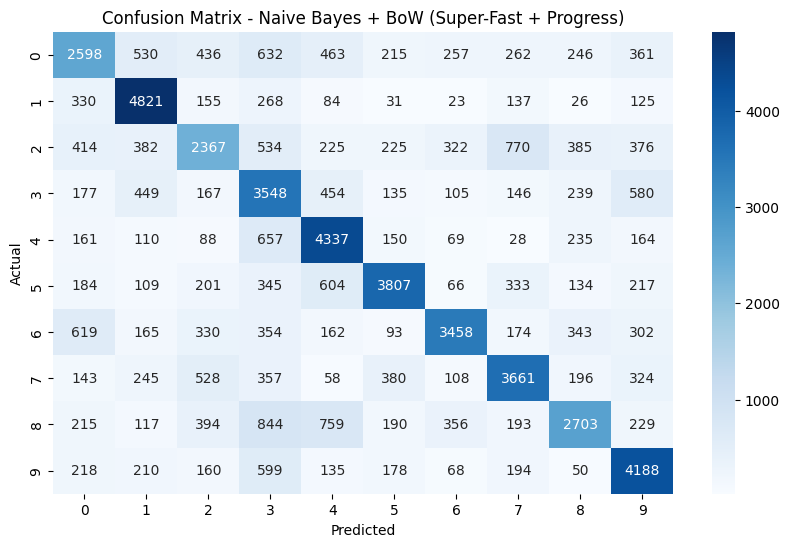

In [ ]:
# =============================
# Naive Bayes + BoW (Super-Fast + Progress)
# =============================
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# --- Load preprocessed data ---
train = pd.read_csv("train_processed.csv")
test  = pd.read_csv("test_processed.csv")
X_train, y_train = train["clean_text"], train["Class"]
X_test, y_test   = test["clean_text"], test["Class"]

# --- BoW Vectorization (small features for speed) ---
vectorizer = CountVectorizer(max_features=1000)
Xtr = vectorizer.fit_transform(X_train)
Xte = vectorizer.transform(X_test)

# --- Naive Bayes setup ---
model = MultinomialNB()

# --- Simulated incremental training with progression ---
print("Training Naive Bayes (BoW, super-fast) with progress...")
batch_size = int(Xtr.shape[0] / 10)  # split into 10 mini-batches
for i in tqdm(range(10)):
    start = i * batch_size
    end = (i + 1) * batch_size if i < 9 else Xtr.shape[0]
    model.partial_fit(Xtr[start:end], y_train[start:end], classes=y_train.unique())

print("Training complete!")

# --- Predictions ---
preds = model.predict(Xte)

# --- Metrics ---
print("\nAccuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds, average="weighted"))
print(classification_report(y_test, preds))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes + BoW (Super-Fast + Progress)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Training Naive Bayes (TF-IDF, super-fast) with progress...


100%|██████████| 10/10 [00:00<00:00, 15.63it/s]


Training complete!

Accuracy: 0.6007933465557759
F1 Score: 0.5965991638164058
                        precision    recall  f1-score   support

    Business & Finance       0.51      0.44      0.47      6000
  Computers & Internet       0.68      0.81      0.74      6000
 Education & Reference       0.50      0.40      0.45      6000
 Entertainment & Music       0.52      0.53      0.52      6000
Family & Relationships       0.56      0.77      0.65      5999
                Health       0.66      0.67      0.66      6000
 Politics & Government       0.69      0.61      0.65      6000
 Science & Mathematics       0.61      0.64      0.62      6000
     Society & Culture       0.55      0.48      0.51      6000
                Sports       0.73      0.66      0.70      6000

              accuracy                           0.60     59999
             macro avg       0.60      0.60      0.60     59999
          weighted avg       0.60      0.60      0.60     59999



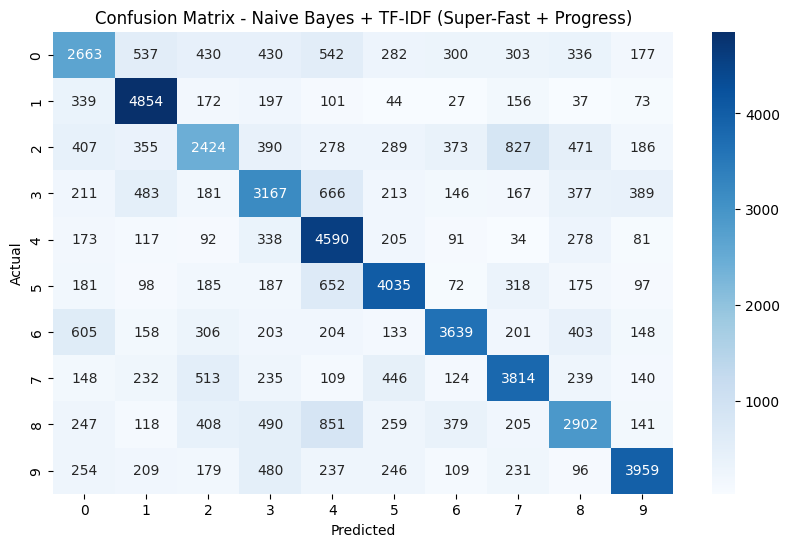

In [ ]:
# =============================
# Naive Bayes + TF-IDF (Super-Fast + Progress)
# =============================
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# --- Load preprocessed data ---
train = pd.read_csv("train_processed.csv")
test  = pd.read_csv("test_processed.csv")
X_train, y_train = train["clean_text"], train["Class"]
X_test, y_test   = test["clean_text"], test["Class"]

# --- TF-IDF Vectorization (small features for speed) ---
vectorizer = TfidfVectorizer(max_features=1000)
Xtr = vectorizer.fit_transform(X_train)
Xte = vectorizer.transform(X_test)

# --- Naive Bayes setup ---
model = MultinomialNB()

# --- Incremental training with progress ---
print("Training Naive Bayes (TF-IDF, super-fast) with progress...")
batch_size = int(Xtr.shape[0] / 10)  # split into 10 mini-batches
for i in tqdm(range(10)):
    start = i * batch_size
    end = (i + 1) * batch_size if i < 9 else Xtr.shape[0]
    model.partial_fit(Xtr[start:end], y_train[start:end], classes=y_train.unique())

print("Training complete!")

# --- Predictions ---
preds = model.predict(Xte)

# --- Metrics ---
print("\nAccuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds, average="weighted"))
print(classification_report(y_test, preds))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes + TF-IDF (Super-Fast + Progress)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Training DNN  with progress...


 10%|█         | 1/10 [00:18<02:45, 18.36s/it]

Epoch 1/10 - loss: 1.3341 - acc: 0.5758 - val_acc: 0.6185


 20%|██        | 2/10 [00:40<02:43, 20.50s/it]

Epoch 2/10 - loss: 1.2165 - acc: 0.6127 - val_acc: 0.6220


 30%|███       | 3/10 [00:58<02:15, 19.31s/it]

Epoch 3/10 - loss: 1.1891 - acc: 0.6194 - val_acc: 0.6229


 40%|████      | 4/10 [01:16<01:54, 19.06s/it]

Epoch 4/10 - loss: 1.1705 - acc: 0.6246 - val_acc: 0.6263


 50%|█████     | 5/10 [01:35<01:33, 18.78s/it]

Epoch 5/10 - loss: 1.1553 - acc: 0.6281 - val_acc: 0.6264


 60%|██████    | 6/10 [01:54<01:15, 18.88s/it]

Epoch 6/10 - loss: 1.1404 - acc: 0.6330 - val_acc: 0.6262


 70%|███████   | 7/10 [02:12<00:56, 18.69s/it]

Epoch 7/10 - loss: 1.1309 - acc: 0.6351 - val_acc: 0.6275


 80%|████████  | 8/10 [02:30<00:37, 18.51s/it]

Epoch 8/10 - loss: 1.1202 - acc: 0.6380 - val_acc: 0.6260


 90%|█████████ | 9/10 [02:51<00:19, 19.12s/it]

Epoch 9/10 - loss: 1.1115 - acc: 0.6409 - val_acc: 0.6275


100%|██████████| 10/10 [03:15<00:00, 19.54s/it]

Epoch 10/10 - loss: 1.1033 - acc: 0.6441 - val_acc: 0.6260
Training complete!


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Accuracy: 0.6259604326738779
F1 Score: 0.6201196782742713
                        precision    recall  f1-score   support

    Business & Finance       0.58      0.41      0.48      6000
  Computers & Internet       0.74      0.82      0.78      6000
 Education & Reference       0.53      0.40      0.46      6000
 Entertainment & Music       0.54      0.58      0.56      6000
Family & Relationships       0.63      0.74      0.68      5999
                Health       0.69      0.69      0.69      6000
 Politics & Government       0.66      0.68      0.67      6000
 Science & Mathematics       0.59      0.69      0.64      6000
     Society & Culture       0.54      0.51      0.53      6000
                Sports       0.70      0.73      0.71      6000

              accuracy                           0.63     59999
             macro avg       0.62      0.63      0.62     59999
          weighted avg       0.62      0.63      0.62     59999


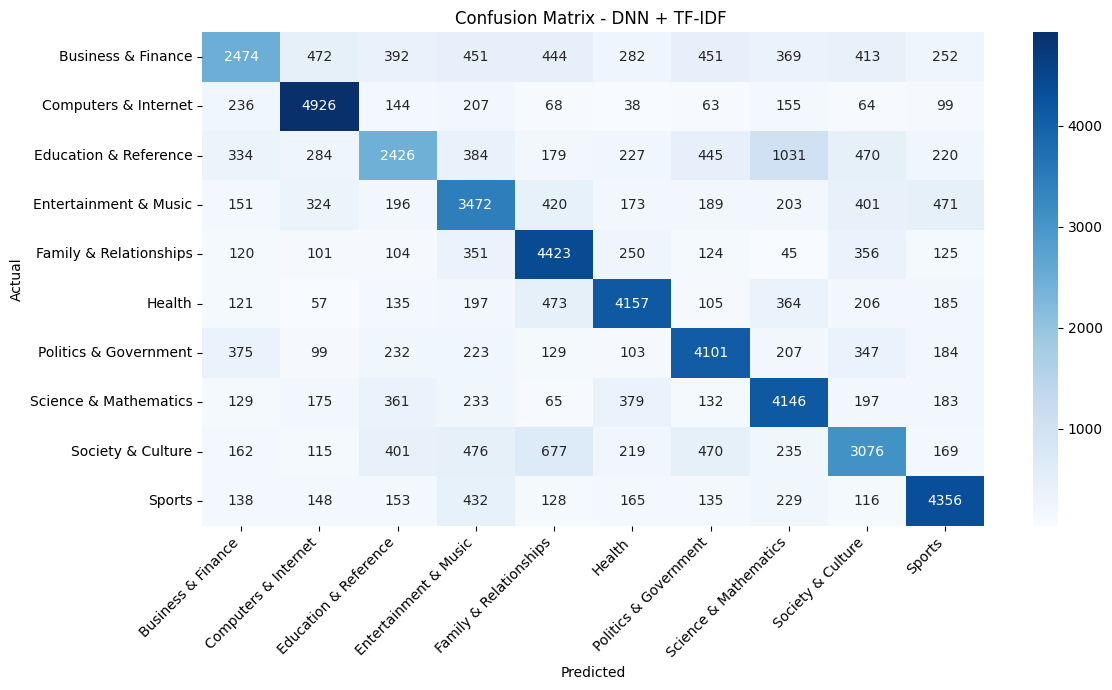

In [ ]:
# =============================
# Deep Neural Network + TF-IDF
# =============================
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tqdm import tqdm

# --- Load preprocessed data ---
train = pd.read_csv("train_processed.csv")
test  = pd.read_csv("test_processed.csv")
X_train, y_train = train["clean_text"], train["Class"]
X_test, y_test   = test["clean_text"], test["Class"]

# --- TF-IDF Vectorization (lightweight features) ---
vectorizer = TfidfVectorizer(max_features=1000)
Xtr = vectorizer.fit_transform(X_train).toarray()
Xte = vectorizer.transform(X_test).toarray()

# --- Encode labels ---
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc  = encoder.transform(y_test)

# --- Build a lightweight DNN ---
model = models.Sequential([
    layers.Input(shape=(1000,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Training with progress bar ---
epochs = 10
batch_size = 128
print("Training DNN  with progress...")

for epoch in tqdm(range(1, epochs + 1)):
    history = model.fit(Xtr, y_train_enc,
                        epochs=1,
                        batch_size=batch_size,
                        verbose=0,
                        validation_data=(Xte, y_test_enc))
    acc = history.history['accuracy'][0]
    val_acc = history.history['val_accuracy'][0]
    print(f"Epoch {epoch}/{epochs} - loss: {history.history['loss'][0]:.4f} "
          f"- acc: {acc:.4f} - val_acc: {val_acc:.4f}")

print("Training complete!")

# --- Predictions ---
preds = model.predict(Xte).argmax(axis=1)

# --- Metrics ---
print("\nAccuracy:", accuracy_score(y_test_enc, preds))
print("F1 Score:", f1_score(y_test_enc, preds, average="weighted"))
print(classification_report(y_test_enc, preds, target_names=encoder.classes_))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_enc, preds)
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_,
            cbar=True)
plt.title("Confusion Matrix - DNN + TF-IDF ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Training DNN (BoW, light) with progress...


 10%|█         | 1/10 [00:24<03:37, 24.13s/it]

Epoch 1/10 - loss: 1.3823 - acc: 0.5625 - val_acc: 0.6161


 20%|██        | 2/10 [00:46<03:06, 23.26s/it]

Epoch 2/10 - loss: 1.2408 - acc: 0.6066 - val_acc: 0.6211


 30%|███       | 3/10 [01:07<02:33, 21.95s/it]

Epoch 3/10 - loss: 1.2034 - acc: 0.6145 - val_acc: 0.6235


 40%|████      | 4/10 [01:27<02:08, 21.42s/it]

Epoch 4/10 - loss: 1.1793 - acc: 0.6204 - val_acc: 0.6251


 50%|█████     | 5/10 [01:50<01:49, 21.99s/it]

Epoch 5/10 - loss: 1.1604 - acc: 0.6256 - val_acc: 0.6246


 60%|██████    | 6/10 [02:13<01:29, 22.27s/it]

Epoch 6/10 - loss: 1.1479 - acc: 0.6279 - val_acc: 0.6248


 70%|███████   | 7/10 [02:32<01:03, 21.12s/it]

Epoch 7/10 - loss: 1.1359 - acc: 0.6314 - val_acc: 0.6247


 80%|████████  | 8/10 [02:52<00:41, 20.75s/it]

Epoch 8/10 - loss: 1.1270 - acc: 0.6345 - val_acc: 0.6250


 90%|█████████ | 9/10 [03:14<00:21, 21.30s/it]

Epoch 9/10 - loss: 1.1173 - acc: 0.6370 - val_acc: 0.6236


100%|██████████| 10/10 [03:35<00:00, 21.53s/it]

Epoch 10/10 - loss: 1.1099 - acc: 0.6382 - val_acc: 0.6242
Training complete!


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Accuracy: 0.6242270704511742
F1 Score: 0.6187305883849431
                        precision    recall  f1-score   support

    Business & Finance       0.57      0.42      0.49      6000
  Computers & Internet       0.75      0.81      0.78      6000
 Education & Reference       0.54      0.38      0.45      6000
 Entertainment & Music       0.56      0.57      0.57      6000
Family & Relationships       0.65      0.72      0.69      5999
                Health       0.65      0.72      0.68      6000
 Politics & Government       0.67      0.67      0.67      6000
 Science & Mathematics       0.53      0.74      0.62      6000
     Society & Culture       0.55      0.52      0.53      6000
                Sports       0.75      0.70      0.72      6000

              accuracy                           0.62     59999
             macro avg       0.62      0.62      0.62     59999
          weighted avg       0.62      0.62      0.62     59999


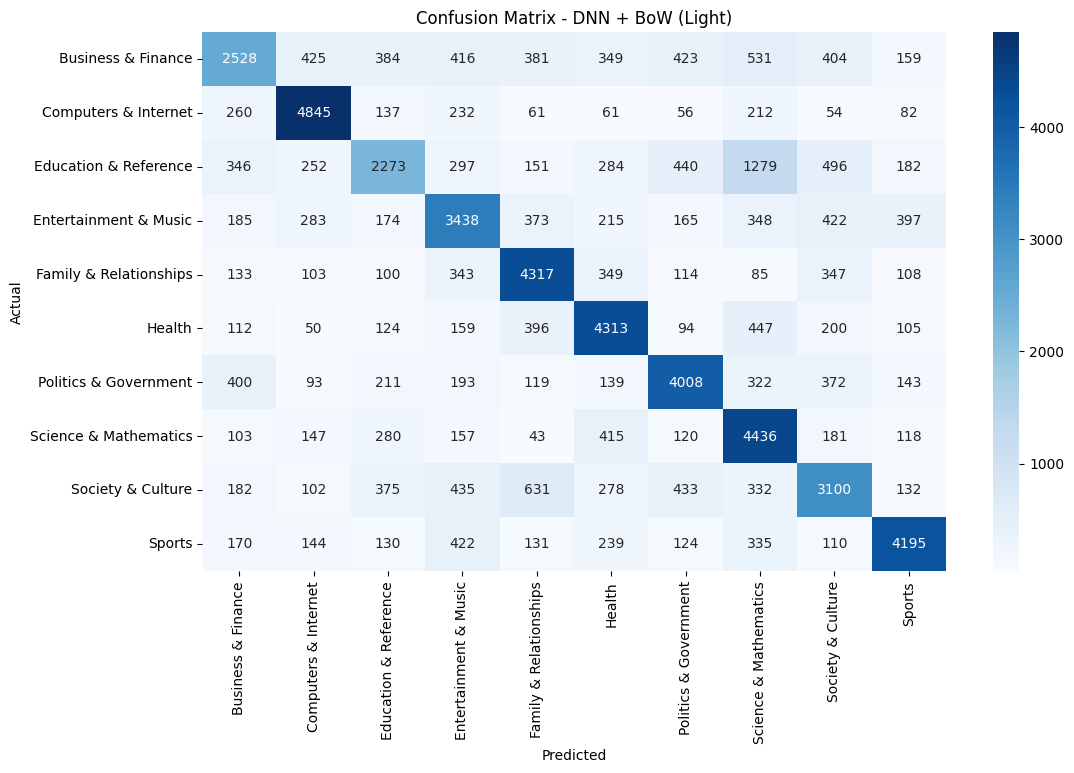

In [ ]:
# =============================
# Deep Neural Network + BoW (Light + Progress)
# =============================
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tqdm import tqdm

# --- Load preprocessed data ---
train = pd.read_csv("train_processed.csv")
test  = pd.read_csv("test_processed.csv")
X_train, y_train = train["clean_text"], train["Class"]
X_test, y_test   = test["clean_text"], test["Class"]

# --- BoW Vectorization (lightweight features) ---
vectorizer = CountVectorizer(max_features=1000)
Xtr = vectorizer.fit_transform(X_train).toarray()
Xte = vectorizer.transform(X_test).toarray()

# --- Encode labels ---
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc  = encoder.transform(y_test)

# --- Build a lightweight DNN ---
model = models.Sequential([
    layers.Input(shape=(1000,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Training with progress bar ---
epochs = 10
batch_size = 128
print("Training DNN (BoW, light) with progress...")

for epoch in tqdm(range(1, epochs + 1)):
    history = model.fit(Xtr, y_train_enc,
                        epochs=1,
                        batch_size=batch_size,
                        verbose=0,
                        validation_data=(Xte, y_test_enc))
    acc = history.history['accuracy'][0]
    val_acc = history.history['val_accuracy'][0]
    print(f"Epoch {epoch}/{epochs} - loss: {history.history['loss'][0]:.4f} "
          f"- acc: {acc:.4f} - val_acc: {val_acc:.4f}")

print("Training complete!")

# --- Predictions ---
preds = model.predict(Xte).argmax(axis=1)

# --- Metrics ---
print("\nAccuracy:", accuracy_score(y_test_enc, preds))
print("F1 Score:", f1_score(y_test_enc, preds, average="weighted"))
print(classification_report(y_test_enc, preds, target_names=encoder.classes_))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_enc, preds)
plt.figure(figsize=(12,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("Confusion Matrix - DNN + BoW (Light)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


1. Accuracy & F1 Comparison (Bar Plot)

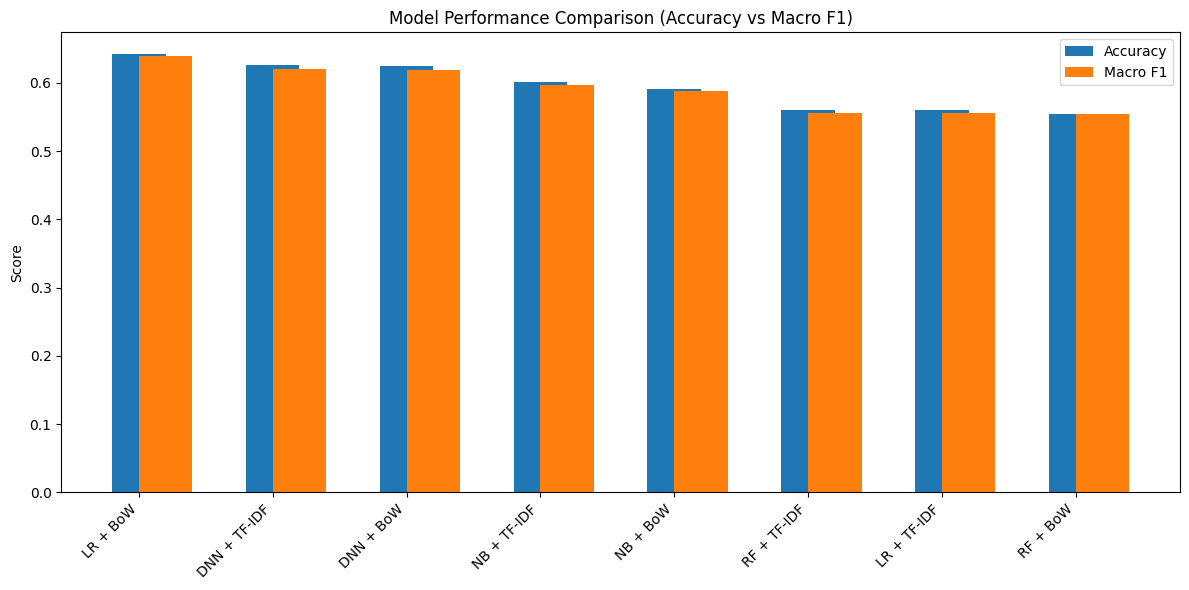

In [ ]:
import matplotlib.pyplot as plt

# Data from your report
models = [
    "LR + BoW", "DNN + TF-IDF", "DNN + BoW",
    "NB + TF-IDF", "NB + BoW", "RF + TF-IDF",
    "LR + TF-IDF", "RF + BoW"
]
accuracy = [0.6417, 0.6260, 0.6242, 0.6008, 0.5915, 0.5602, 0.5604, 0.5549]
f1 = [0.6385, 0.6201, 0.6187, 0.5966, 0.5881, 0.5562, 0.5552, 0.5536]

x = range(len(models))
plt.figure(figsize=(12,6))
plt.bar(x, accuracy, width=0.4, label="Accuracy", align='center')
plt.bar(x, f1, width=0.4, label="Macro F1", align='edge')

plt.xticks(x, models, rotation=45, ha="right")
plt.ylabel("Score")
plt.title("Model Performance Comparison (Accuracy vs Macro F1)")
plt.legend()
plt.tight_layout()
plt.show()


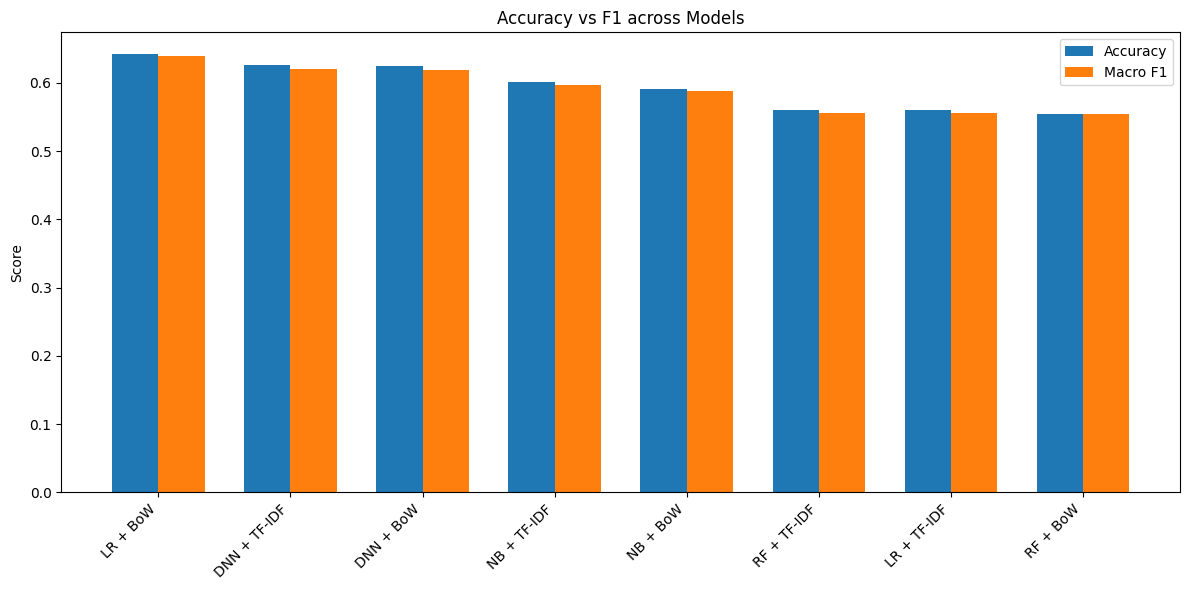

In [ ]:
import numpy as np

x = np.arange(len(models))  # model positions
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, accuracy, width, label='Accuracy')
plt.bar(x + width/2, f1, width, label='Macro F1')

plt.xticks(x, models, rotation=45, ha="right")
plt.ylabel("Score")
plt.title("Accuracy vs F1 across Models")
plt.legend()
plt.tight_layout()
plt.show()


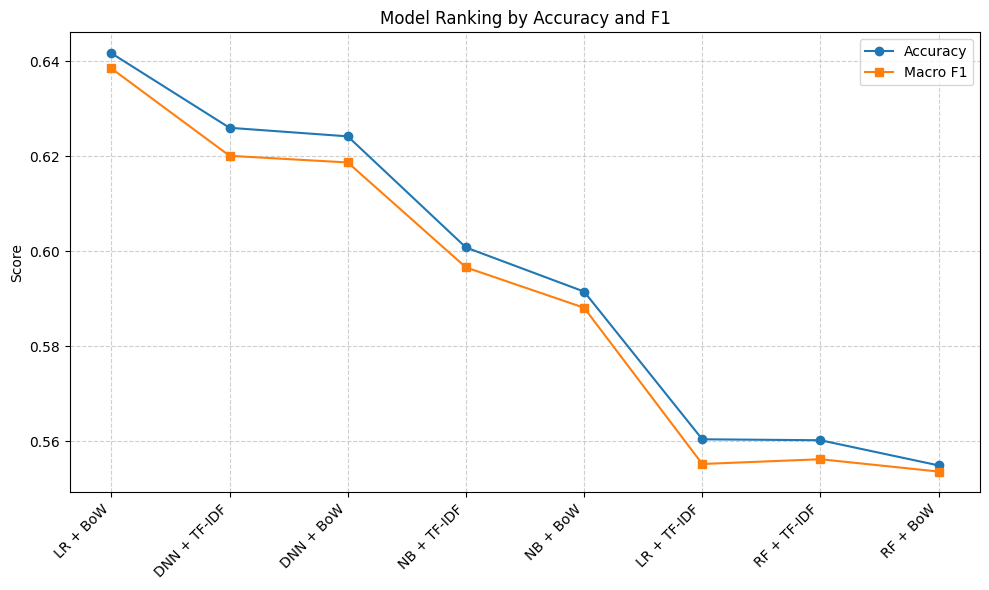

In [ ]:
import pandas as pd

df = pd.DataFrame({"Model": models, "Accuracy": accuracy, "F1": f1})
df_sorted = df.sort_values("Accuracy", ascending=False)

plt.figure(figsize=(10,6))
plt.plot(df_sorted["Model"], df_sorted["Accuracy"], marker="o", label="Accuracy")
plt.plot(df_sorted["Model"], df_sorted["F1"], marker="s", label="Macro F1")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Score")
plt.title("Model Ranking by Accuracy and F1")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


SIFAR CODES
